In [1]:
import itertools

import numpy as np
import matplotlib.pyplot as plt

*Jack Bullen*

*Monday, October 2nd, 2023*

*Lab 20*

Examples here may not demonstrate the main use of the function, but are used to demonstrate the function's behavior.

Furthermore, many of these things can be achieved with loops, but the point is that with itertools uses iterators.

## 1. itertools.product

- **Description**: `itertools.product` is used to compute the cartesian product of input iterables. It is equivalent to nested for-loops. For example, `product(A, B)` returns the same as `((x, y) for x in A for y in B)`.
- **Example**: We can use this to find all the possible ordered pairs of elements from two sets.

### Example
Consider the set

$$Z = \{1, 2, 3, 4, 5, 6, 7, 8, 9, 10\}$$ 

Use `itertools.product` to find the cartesian product 

$$\mathbb{Z} \times \mathbb{Z} = \{(a, b)\ |\ a \in \mathbb{Z}\ \text{and}\ b \in \mathbb{Z}\}$$

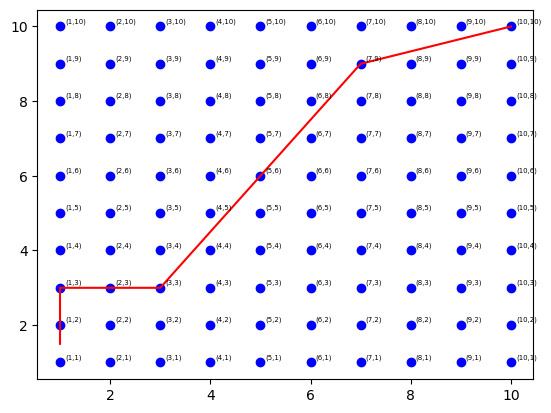

In [2]:
Z = np.linspace(1, 10, 10)

cartesian_product = itertools.product(Z, Z)
for x,y in cartesian_product:
    plt.scatter(x, y, c='b')
    plt.text(x+0.1, y+0.1, f'({int(x)},{int(y)})', fontsize=5)
    
plt.plot([1,1,3,7,10], [1.5,3,3,9,10], c='r')

## 2. itertools.permutations

- **Description**: `itertools.permutations` is used to return all possible permutations of a given iterable. It returns all possible arrangements of the elements of the iterable with a specified length. If the length is not specified, it defaults to the length of the iterable.
- **Example**: We can use this to find all the possible arrangements of a set of numbers or characters.

### Example
Find the number of permutations of sets of size 1 through 10

In [3]:
for i in range(10):
    i+=1
    set_of_i_elements = {x for x in range(i)}
    print(i, len(list(itertools.permutations(set_of_i_elements))))

1 1
2 2
3 6
4 24
5 120
6 720
7 5040
8 40320
9 362880
10 3628800


## 3. itertools.combinations

- **Description**: `itertools.combinations` is used to return all possible combinations of a given iterable with a specified length. It returns all possible selections of the elements of the iterable where the order of selection does not matter.
- **Example**: We can use this to find all the possible selections of a subset of elements from a set.

### Example
Generate a random graph on the set vertices from the first example, where each vertex is connect with probability $p=0.7/dist^4$ where $dist$ is the taxicab metrix.

 Find all possible edges.

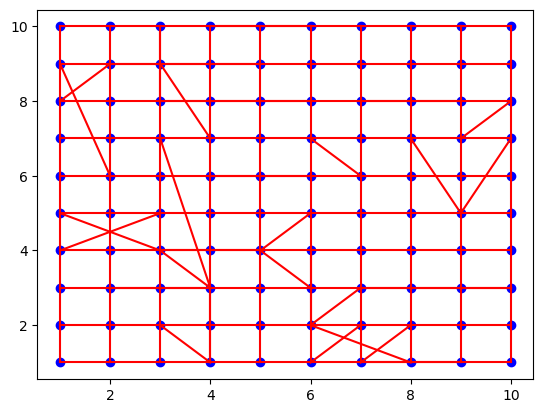

In [4]:
from random import random

Z = np.linspace(1, 10, 10)
lattice = list(itertools.product(Z, Z))

for x,y in lattice:
    plt.scatter(x, y, c='b')

def taxicab(x, y):
    return abs(x[0] - y[0]) + abs(x[1] - y[1])

edges = []
for edge in itertools.combinations(lattice, 2):
    rand = random()
    if (rand < 1/(taxicab(edge[0], edge[1])**4)):
        edges.append(edge)

for edge in edges:
    plt.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], c='r')

## 4. itertools.cycle

- **Description**: `itertools.cycle` is used to return elements from the iterable until it is exhausted. Then it repeats the sequence indefinitely.
- **Example**: We can use this to create a cyclic sequence of variables, which can be useful when studying groups.

### Example
Let's consider a sequence $D = (\text{sin}, \text{arcsin}, \text{sin}, ...)$. We will use `itertools.cycle` to create a cyclic sequence from $D$, then reduce them down to the identity.

In [5]:
from functools import reduce

can_you_find_an_actual_use_for_this_iterator = [lambda x: np.sin(x), lambda x: np.arcsin(x)]

cyclic_sequence = itertools.cycle(can_you_find_an_actual_use_for_this_iterator)

cyclic_elements = [next(cyclic_sequence) for _ in range(100)] # 100 applications of sin(arcsin(x))

# cyclic_elements = [lambda x: np.sin(x), lambda x: np.arcsin(x)] * 100
# x = 0.2
# for f in cyclic_elements:
#     print(x)
#     x = f(x)

reduce(lambda f, g: lambda x: f(g(x)), cyclic_elements)(0.2)

0.2

## 5. itertools.chain

- **Description**: `itertools.chain` is used to treat consecutive sequences as a single sequence. It returns elements from the first iterable until it is exhausted, then proceeds to the next iterable, until all of the iterables are exhausted.
- **Example**: We can use this to combine multiple sequences into one, which can be useful in various mathematical contexts, especially in combinatorics when dealing with multiple sets or sequences.

### Example
Suppose we have three sequences (or sets) representing the number of ways to arrange different objects:
- $S_1 = (a, b, c)$
- $S_2 = (1, 2)$
- $S_3 = (\text{red}, \text{blue})$ 

We will use `itertools.chain` to create a single sequence combining all the arrangements from $S_1$, $S_2$, and $S_3$. This can represent a scenario in combinatorics where we are considering different types of arrangements together.

In [6]:
S1 = {'a', 'b', 'c'}
S2 = {1:'hehe', 2:'haha', 3:'hoho'}
S3 = ['red', 'bleu', 'orange']

for x in itertools.chain(S1, S2, S3):
    print(x)

c
b
a
1
2
3
red
bleu
orange


## 6. itertools.compress

- **Description**: `itertools.compress` is used to filter elements from an iterable. It filters elements from the data iterable where the corresponding element in the selectors iterable is true.
- **Example**: We can use this to selectively filter elements from a sequence based on some condition, which can be useful in various mathematical contexts, especially in number theory and set theory.

### Example
Suppose we have a sequence $S = (2, 3, 5, 6, 7, 8, 9, 10)$ representing a set of numbers, and we want to filter out the prime numbers from this sequence. We can represent the condition of being prime by another sequence $C = (\text{True}, \text{True}, \text{True}, \text{False}, \text{True}, \text{False}, \text{False}, \text{False})$, where each element of $C$ represents whether the corresponding element in $S$ is prime or not.

We will use `itertools.compress` to filter the prime numbers from sequence $S$ based on the condition sequence $C$.

In [7]:
# this is not how i would address this problem, just trying to show itertools.compress

S = tuple(range(2, 11))

# this code accomplishes the same thing as the second input to itertools.compress
# is_divisor = []
# for x in S:
#     val = False
#     for possible_divisor in range(2, x):
#         if x % possible_divisor == 0:
#             val = True
#             break
#     is_divisor.append(val)

print('S =', S)
print(f'Primes in S:', end=' ')
for x in itertools.compress(S, [not any([x % possible_divisor == 0 for possible_divisor in range(2, x)]) for x in S]):
    print(x, end=', ')

S = (2, 3, 4, 5, 6, 7, 8, 9, 10)
Primes in S: 2, 3, 5, 7, 

## 7. itertools.count

- **Description**: `itertools.count` generates an iterator that produces consecutive integers indefinitely, starting from a provided start value. The step value can also be specified.
- **Example**: This can be useful in mathematics to generate an infinite arithmetic sequence.

### Example
Let's consider generating an infinite arithmetic sequence starting from 1 with a common difference of 2, represented as $\{1, 3, 5, 7, 9, 11, 13, \ldots\}$. We will use `itertools.count` to represent this sequence.

In [8]:
for x in itertools.count(1, 2):
    print(x)

    if x>10:
        break

1
3
5
7
9
11


## 8. itertools.dropwhile

- **Description**: `itertools.dropwhile` makes an iterator that drops elements from the iterable as long as the predicate is true; afterwards, returns every element.
- **Example**: This can be useful to skip elements in a sequence until a condition is met and then consider the rest of the elements.

### Example
Suppose we have a sequence $S = (1, 3, 5, 7, 9, 11, 13, 15, 17, 19)$ representing a set of odd numbers, and we want to skip elements in this sequence until we find a number greater than 10 and then consider the rest of the elements. We will use `itertools.dropwhile` to achieve this.

In [9]:
S = [1, 3, 5, 7, 9, 11, 13, 15, 17, -660000, 0, 19]

filtered_sequence = itertools.dropwhile(lambda x: x <= 10, S) # once we see a number after 10, we keep all the rest

filtered_elements = list(filtered_sequence)
filtered_elements

[11, 13, 15, 17, -660000, 0, 19]

## 9. itertools.filterfalse

- **Description**: `itertools.filterfalse` makes an iterator that filters elements for which a predicate is False.
- **Example**: This can be useful to filter out elements in a sequence that do not satisfy a certain condition.

### Example
Suppose we have a sequence $S = (2, 4, 6, 8, 10, 12, 14, 16, 18, 20)$ representing a set of even numbers, and we want to filter out the numbers that are not multiples of 4. We will use `itertools.filterfalse` to achieve this.

In [10]:
S = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

filtered_sequence = itertools.filterfalse(lambda x: x % 4 != 0, S)

filtered_elements = list(filtered_sequence)
filtered_elements

[4, 8, 12, 16, 20]

In [11]:
list(filter(lambda x: not x%4!=0, S))

[4, 8, 12, 16, 20]

## 10. itertools.groupby

- **Description**: `itertools.groupby` makes an iterator that returns consecutive keys and groups from the input iterable. It is often used to group *adjacent* elements that have the same value or satisfy a certain condition.
- **Example**: This can be useful to group elements in a sequence based on a certain property or condition.

### Example
Suppose we have a sequence $S = (2, 4, 6, 9, 11, 13, 16, 18, 20)$ representing a set of numbers, and we want to group the numbers in this sequence based on their parity (even or odd). We will use `itertools.groupby` to achieve this.

In [12]:
S = [2, 4, 6, 9, 11, 13, 16, 16, 18, 20]

for key, group in itertools.groupby(S, key = lambda x: x%2==0):
    print(key, list(group))

# note 1. that the iterates that itertools.groupby gives are key, iterator pairs,
# where the iterator is the values it seen with the key value.
# 2. it seperates based on what it sees. these can easily be combined if desried.

True [2, 4, 6]
False [9, 11, 13]
True [16, 16, 18, 20]


## 11. itertools.islice

- **Description**: `itertools.islice` makes an iterator that returns selected elements from the input iterable. It is used to slice an iterable and return selected portions of it.

### Example
Suppose we have a sequence $S = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)$ representing a set of numbers, and we want to select a subsequence from the 6th to the 8th element of this sequence, inclusive. We will use `itertools.islice` to achieve this.

In [13]:
S = list(range(0, 11))
list(itertools.islice(S, 6, 9))

[6, 7, 8]

## 12. itertools.starmap

- **Description**: `itertools.starmap` makes an iterator that computes the function using arguments obtained from the input iterable. It is similar to `map()`, but instead of constructing a tuple from multiple iterables, it splits the items in the single iterable using the `*` operator.
- **Example**: This can be useful to apply a function to elements in a sequence where each element is an iterable of arguments.

### Example
Suppose we have a sequence $S = ((2, 5), (3, 4), (6, 7))$ representing a set of pairs, and we want to calculate the power of each pair, i.e., $2^5$, $3^4$, and $6^7$. We will use `itertools.starmap` to achieve this.

In [24]:
S = [(2, 3), (3, 4), (6, 7)]

results = list(itertools.starmap(pow, S))

results

[8, 81, 279936]

In [15]:
[reduce(lambda a,b: a**b, pair) for pair in S]

[32, 81, 279936]

In [22]:
list(map(lambda x: x[0]**x[1], S))

[32, 81, 279936]

## 13. itertools.takewhile

- **Description**: `itertools.takewhile` makes an iterator that returns elements from the iterable as long as the predicate is true.
- **Example**: This can be used to return elements from a sequence as long as they satisfy a certain condition.

### Example
Suppose we have a sequence $S = (2, 4, 6, 8, 10, 12, 15, 18, 20)$, and we want to take elements as long as they are less than 15.

In [16]:
S = [2, 4, 6, 8, 10, 12, 15, 18, 20]
predicate = lambda x: x < 15

taken_sequence = list(itertools.takewhile(predicate, S))
taken_sequence

[2, 4, 6, 8, 10, 12]

## 14. itertools.tee

- **Description**: `itertools.tee` returns n independent iterators from a single iterable.
- **Example**: This can be used to create multiple iterators from a single sequence.

### Example
Suppose we have a sequence $S = (1, 2, 3, 4, 5)$, and we want to create two independent iterators from this sequence. We will use `itertools.tee` to achieve this. This can represent a scenario in combinatorics where we are considering different arrangements in parallel.

In [17]:
S = [1, 2, 3, 4, 5]

iterator1, iterator2 = itertools.tee(S, 2)

elements_from_iterator1 = [element for element in iterator1]

elements_from_iterator2 = [element for element in iterator2]

elements_from_iterator1, elements_from_iterator2

([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])

## Create your own example for map()

- **Description**: The `map()` function applies a given function to all items of an iterable (e.g., list, tuple) and returns an iterator that produces the results. It can be used to apply a function to each element of an iterable.

In [18]:
# Example goes here